In [8]:
#in this project i will be creating a model which can be used to do price prediction on popular kenyan housing neighborhoods
#credits to kaggle for the dataset...link..https://www.kaggle.com/iamasteriix/rental-apartments-in-kenya

In [9]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']==(20,10)
%matplotlib inline

In [10]:
#loading the dataset
df=pd.read_csv('C://Users/sojore/Documents/rent_apts.csv')
df.head()

,Agency,Neighborhood,Price,link,sq_mtrs,Bedrooms,Bathrooms
0,Buy Rent Shelters,"General Mathenge, Westlands","KSh 155,000",/listings/4-bedroom-apartment-for-rent-general...,4.0,4.0,4.0
1,Kenya Classic Homes,"Kilimani, Dagoretti North","KSh 100,000",/listings/3-bedroom-apartment-for-rent-kiliman...,300.0,3.0,4.0
2,Absolute Estate Agents,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",/listings/3-bedroom-apartment-for-rent-lavingt...,3.0,3.0,5.0
3,A1 Properties Limited,"Kilimani, Dagoretti North","KSh 135,000",/listings/3-bedroom-apartment-for-rent-kiliman...,227.0,3.0,4.0
4,Pmc Estates Limited,"Imara Daima, Embakasi","KSh 50,000",/listings/3-bedroom-apartment-for-rent-imara-d...,3.0,3.0,NaN


In [11]:
#exploring the dataset
df.shape

(1848, 7)

In [12]:
#droping unneccesary columns,
df1=df.drop(['Agency','link'],axis='columns')
df1.head()

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
0,"General Mathenge, Westlands","KSh 155,000",4.0,4.0,4.0
1,"Kilimani, Dagoretti North","KSh 100,000",300.0,3.0,4.0
2,"Hatheru Rd,, Lavington, Dagoretti North","KSh 75,000",3.0,3.0,5.0
3,"Kilimani, Dagoretti North","KSh 135,000",227.0,3.0,4.0
4,"Imara Daima, Embakasi","KSh 50,000",3.0,3.0,NaN


In [13]:
df1.groupby('Neighborhood')['Neighborhood'].agg('count').sort_values(ascending=False)

Neighborhood
Kilimani, Dagoretti North                                  168
Kileleshwa, Dagoretti North                                108
Westlands Area, Westlands                                  105
Lavington, Dagoretti North                                  90
Riverside, Westlands                                        54
                                                          ... 
Off Brookside Drive, Soorae Flats, Brookside, Westlands      1
Off Dennis Pritt Road, Kileleshwa, Dagoretti North           1
Off Gitanga Road, Valley Arcade, Dagoretti North             1
Off Naivasha road, Dagoretti Corner, Dagoretti South         1
, Dennis Pritt, Kilimani, Dagoretti North                    1
Name: Neighborhood, Length: 647, dtype: int64

In [14]:
#handling the missing values
df1.isnull().sum()

Neighborhood      0
Price             0
sq_mtrs           2
Bedrooms          3
Bathrooms       291
dtype: int64

In [15]:
#i will fill the nan values in bedrooms,bathrooms and sq_mtrs columns with the mean floor value,numpy round function..
df1.Bathrooms.unique()

array([ 4.,  5., nan,  3.,  2.,  1.,  6.])

In [16]:
from math import *
df1.Bathrooms.mean()
floor_val=floor(df1.Bathrooms.mean())
f=float(floor_val)
f

2.0

In [17]:
df1['Bathrooms']=df1['Bathrooms'].fillna(f)
df1['Bathrooms'].isna().any()

False

In [18]:
df1.Bedrooms.unique()

array([ 4.,  3.,  2.,  1.,  0., nan,  5.,  6.])

In [19]:
f1=np.round(df1.Bedrooms.mean(),0)
f1

3.0

In [20]:
df1.Bedrooms=df1.Bedrooms.fillna(f1)
df1.Bedrooms.isna().sum()

0

In [21]:
df1.sq_mtrs.mode()         

0    3.0
dtype: float64

In [22]:
df1.sq_mtrs=df1.sq_mtrs.fillna(3.0)

In [23]:
df1.isnull().sum()

Neighborhood    0
Price           0
sq_mtrs         0
Bedrooms        0
Bathrooms       0
dtype: int64

In [24]:
#now i dont have any nan values in my dataset
#

In [25]:
df2=df1.copy()
df2.sample(10)

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
996,"Kilimani, Dagoretti North","KSh 100,000",14.0,2.0,2.0
1313,"Lantana, Westlands Area, Westlands","KSh 120,000",200.0,4.0,5.0
1773,"Lavington, Dagoretti North","KSh 165,000",2.0,2.0,2.0
1262,"Rhapta Road, Westlands Area, Westlands","KSh 120,000",3.0,3.0,3.0
96,"Kisumu West, Kisumu West","KSh 30,000",1.0,1.0,1.0
1556,"Kilimani, Dagoretti North","KSh 140,000",2.0,2.0,2.0
685,"Kilimani, Dagoretti North","KSh 80,000",3.0,3.0,2.0
159,"kikambala road, Kileleshwa, Dagoretti North","KSh 85,000",3.0,3.0,3.0
348,"Kileleshwa, Dagoretti North","KSh 60,000",2.0,2.0,2.0
88,"Kikuyu Town, Kikuyu","KSh 28,000",2.0,2.0,2.0


In [26]:
#Note--i did alot of research on the sq_mtrs values,n found out that it might have been an error  to label these values as sq_mt
#it makes alot of sense for these values to be in sq_ft instead
#in addition to this,any Neighborhood's sq_mtrs put as 1,2,3,4... values also appears to be an error too
#these values instead needs to be in hundreds ,so i will simply multiply all these values by 100
#for example ,instead of having 2-sq_ft,i will have 200-sq-ft==this makes alot more sense 
#n this wont have a bad influence on our model perfomance

In [27]:
#we can write a function to test if we have zero values in the sq_mtrs column
#buh we cant have a zero sq_mtrs house,so this is an error to me,n i will fill these zeros with the mode value instead
def zeros_to_mode_in_sq_mtrs(x):
    if x==0:
        return 3.0
    else:
        return float(x)

In [28]:
zeros_to_mode_in_sq_mtrs(7)

7.0

In [29]:
df2['sq_mtrs']=df2['sq_mtrs'].apply(zeros_to_mode_in_sq_mtrs)

In [30]:
#we already have an f1 value from the fillna for the bedrooms column,so we can use that
def zeros_to_mean_in_bedrooms(x):
    if x==0:
        return f1
    else:
        return float(x)
    
zeros_to_mean_in_bedrooms(5)

5.0

In [31]:
df2['sq_mtrs'].isna().any()

False

In [32]:
df2['Bedrooms']=df2['Bedrooms'].apply(zeros_to_mean_in_bedrooms)

In [33]:
def zeros_to_mean_in_bathrooms(x):
    if x==0:
        return f
    else:
        return x
zeros_to_mean_in_bathrooms(7.0)    

7.0

In [34]:
df2['Bathrooms']=df2['Bathrooms'].apply(zeros_to_mean_in_bathrooms)

In [35]:
df1.loc[275]##for example like in this row --in this row ,see we have zeros on the sq_mtrs and bedrooms,which is an error to me

Neighborhood    Waiyaki Way, Westlands
Price                       KSh 50,000
sq_mtrs                              0
Bedrooms                             0
Bathrooms                            1
Name: 275, dtype: object

In [36]:
df2.loc[275]#now after apply our functions ,we dont have zeros anymore

Neighborhood    Waiyaki Way, Westlands
Price                       KSh 50,000
sq_mtrs                              3
Bedrooms                             3
Bathrooms                            1
Name: 275, dtype: object

In [37]:
df2['Bedrooms'].isnull().sum()

0

In [38]:
df2.isnull().any()

Neighborhood    False
Price           False
sq_mtrs         False
Bedrooms        False
Bathrooms       False
dtype: bool

In [39]:
##change of stategy is that,based on row 708 and 716 on csv file,it seems that those values will thousands of values are the 
#errors,n now i gonna fillna any row with a value greater than 400
#then i will fill those nans with the mode of the column
#n then i will divide any value greater than 50 by 100,then i will round it to next whole number
#any value less than 50 i will set it to the mode(maybe 1,2 or 3)

In [40]:
#now i will write the function
def convert_sqmtrs_to_1_4_range_vals(x):
    if x>=400:
        return 3.0
    elif x>=100 and x<400:
        return np.round(x/100,0)
    elif x>4 and x<100:
        return 3.0
    else:
        return float(x)
        

In [41]:
np.round(3.99,0)

4.0

In [42]:
#testinf the function
convert_sqmtrs_to_1_4_range_vals(150)

2.0

In [43]:
#my function is working pretty good,now we can apply it to the sq_mtrs column
df2['sq_mtrs']=df2['sq_mtrs'].apply(convert_sqmtrs_to_1_4_range_vals)
df2.sample(10)

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms
857,"Lantana road, Westlands Area, Westlands","KSh 90,000",4.0,4.0,4.0
22,"fisharies, mtambo bamburi road, Bamburi, Kisauni","KSh 13,000",1.0,1.0,1.0
374,"Kiambu Road, Kiambu Road","KSh 60,000",4.0,4.0,4.0
1257,"General Mathenge, Westlands","KSh 120,000",3.0,4.0,4.0
1454,"Parklands, Westlands","KSh 130,000",4.0,4.0,3.0
692,"Kileleshwa, Dagoretti North","KSh 80,000",2.0,2.0,2.0
1795,"Parklands, Westlands","KSh 170,000",2.0,2.0,2.0
870,"Riverside, Westlands","KSh 90,000",3.0,3.0,3.0
26,"Kiambu Road, Kiambu Road","KSh 15,000",3.0,3.0,1.0
1781,"riverside, Riverside, Riverside, Westlands","KSh 170,000",3.0,3.0,3.0


In [44]:
#next  i will create a sq_ft column where i will set the sq_ft values to hundreds,it makes more sense that way
#im doing this because i have minimal knowledge on the why sq_mtrs values were given this way

In [45]:
df2['sq_ft']=df2['sq_mtrs'].apply(lambda x: float(x*100))
df2.sample(10)

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,sq_ft
1843,"Laikipia Road, Kileleshwa, Dagoretti North","KSh 180,000",3.0,3.0,2.0,300.0
1725,"Riverside, Westlands","KSh 160,000",3.0,3.0,4.0,300.0
756,"walk to junction mall, Riara road, Lavington, ...","KSh 85,000",2.0,2.0,2.0,200.0
1459,"Rhapta Road, Westlands","KSh 130,000",3.0,3.0,3.0,300.0
991,"Kilimani, Dagoretti North","KSh 98,000",3.0,3.0,4.0,300.0
950,"Raphta rd, Rhapta Road, Westlands","KSh 95,000",2.0,2.0,2.0,200.0
1494,"Westlands Area, Westlands","KSh 135,000",2.0,2.0,2.0,200.0
632,"Off Gitanga Road, Valley Arcade, Dagoretti North","KSh 75,000",3.0,3.0,2.0,300.0
803,"Kilimani, Dagoretti North","KSh 85,000",2.0,2.0,3.0,200.0
282,"Ruaka, Kiambaa","KSh 54,000",3.0,3.0,2.0,300.0


In [46]:
#next i will explore the Price column
#we need to get rid of the KSh on those values using regular expressions
df3=df2.copy()

In [47]:
df4=df3.replace({'Price':'[A-Za-z]'},'',regex=True)
df4.sample(10)

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,sq_ft
616,"kilimani, kilimani, Kilimani, Dagoretti North","75,000",4.0,4.0,4.0,400.0
1032,"Lenana road, Kilimani, Dagoretti North","100,000",3.0,3.0,3.0,300.0
156,"Ruaka, Kiambaa","38,000",3.0,3.0,2.0,300.0
1142,"kileleshwa, Kileleshwa, Kileleshwa, Dagoretti ...","110,000",3.0,3.0,3.0,300.0
255,"Kamiti Road, Kamiti, Kiambaa","50,000",1.0,3.0,2.0,100.0
823,"Nyali, area, Nyali Area, Nyali","88,000",3.0,3.0,4.0,300.0
989,"Kidaruma, Kilimani, Dagoretti North","98,000",3.0,3.0,3.0,300.0
456,"Kileleshwa, Dagoretti North","65,000",2.0,2.0,2.0,200.0
489,"Kahawa West, Roysambu","70,000",3.0,3.0,2.0,300.0
1232,"Lavington, Dagoretti North","115,000",4.0,4.0,5.0,400.0


In [48]:
df4.Price.dtypes

dtype('O')

In [49]:
#we need to get rid of the comma in Price column and set those values to floats
#for this reason i write a function to do the job
def price_to_float(x):
    res=x.split(',')
    if len(res)==2:
        return float(res[0]+res[1])

In [50]:
#testing the function
price_to_float('160,000')

160000.0

In [51]:
#applying the function
df4.Price=df4.Price.apply(price_to_float)
df4.head()

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,sq_ft
0,"General Mathenge, Westlands",155000.0,4.0,4.0,4.0,400.0
1,"Kilimani, Dagoretti North",100000.0,3.0,3.0,4.0,300.0
2,"Hatheru Rd,, Lavington, Dagoretti North",75000.0,3.0,3.0,5.0,300.0
3,"Kilimani, Dagoretti North",135000.0,2.0,3.0,4.0,200.0
4,"Imara Daima, Embakasi",50000.0,3.0,3.0,2.0,300.0


In [52]:
df4.Price.describe()

count      1848.000000
mean      97343.881494
std       40241.322051
min       12000.000000
25%       70000.000000
50%       95000.000000
75%      130000.000000
max      280000.000000
Name: Price, dtype: float64

In [53]:
#exploring the Neighborhood column
df4.groupby('Neighborhood')['Neighborhood'].agg('count').sort_values(ascending=False)

Neighborhood
Kilimani, Dagoretti North                                  168
Kileleshwa, Dagoretti North                                108
Westlands Area, Westlands                                  105
Lavington, Dagoretti North                                  90
Riverside, Westlands                                        54
                                                          ... 
Off Brookside Drive, Soorae Flats, Brookside, Westlands      1
Off Dennis Pritt Road, Kileleshwa, Dagoretti North           1
Off Gitanga Road, Valley Arcade, Dagoretti North             1
Off Naivasha road, Dagoretti Corner, Dagoretti South         1
, Dennis Pritt, Kilimani, Dagoretti North                    1
Name: Neighborhood, Length: 647, dtype: int64

In [54]:
len(df4.groupby('Neighborhood')['Neighborhood'].agg('count').sort_values(ascending=False))

647

In [55]:
#we gonna convert also the neighborhood column by removing the commas
df4.Neighborhood.unique()

array(['General Mathenge, Westlands', 'Kilimani, Dagoretti North',
       'Hatheru Rd,, Lavington, Dagoretti North', 'Imara Daima, Embakasi',
       'Waiyaki Way, Westlands',
       'Off Denis Pritt, Kilimani, Dagoretti North',
       'Westlands Area, Westlands', 'Thika Road, Thika Road',
       'Raphta rd, Rhapta Road, Westlands', 'Thindigua, Thindigua',
       'Kileleshwa, Dagoretti North', 'Riverside, Westlands',
       'Riverside Drive, Riverside, Westlands', 'Parklands, Westlands',
       'Riara, Lavington, Dagoretti North',
       'nyali road, nyali road, Nyali Area, Nyali',
       'Sports Road, Waiyaki Way, Westlands', 'MUIRU, Ruaka, Kiambaa',
       'Ruaka, Kiambaa',
       'fisharies, mtambo bamburi road, Bamburi, Kisauni',
       'SHULE, Ruaka, Kiambaa',
       'Uthiru 87, Waiyaki Way, Uthiru/Ruthimitu, Dagoretti South',
       'Kiambu Road, Kiambu Road', 'Zimmerman, Zimmermann, Roysambu',
       'MUCHATHA- NATIONAL OIL, Ruaka, Kiambaa',
       'Kasarani Area, Kasarani',
    

In [56]:
def convert_comma_to_string(x):
    res=x.split(',')
    y=len(res)
    if y==6:
        return res[0]+res[1]+res[2]+res[3]+res[4]+res[5]
    elif y==5:
        return res[0]+res[1]+res[2]+res[3]+res[4]
    elif y==4:
        return res[0]+res[1]+res[2]+res[3]
    elif y==3:
        return res[0]+res[1]+res[2]
    elif y==2:
        return res[0]+res[1]
    elif y==1:
        return res[0]
    else:
        return None
        
convert_comma_to_string('Links, Rd, Mombasa, Nyali, Mo,mbasa')

'Links Rd Mombasa Nyali Mombasa'

In [57]:
df4.Neighborhood=df4.Neighborhood.apply(convert_comma_to_string)
df4.groupby('Neighborhood')['Neighborhood'].agg('count').sort_values(ascending=False)

Neighborhood
Kilimani Dagoretti North                                168
Kileleshwa Dagoretti North                              108
Westlands Area Westlands                                105
Lavington Dagoretti North                                90
Riverside Westlands                                      54
                                                       ... 
Off Brookside Drive Soorae Flats Brookside Westlands      1
Off Dennis Pritt Road Kileleshwa Dagoretti North          1
Off Gitanga Road Valley Arcade Dagoretti North            1
Off Naivasha road Dagoretti Corner Dagoretti South        1
 Dennis Pritt Kilimani Dagoretti North                    1
Name: Neighborhood, Length: 643, dtype: int64

In [58]:
df4.Neighborhood.isnull().any()

True

In [59]:
df4.isna().sum()

Neighborhood    2
Price           0
sq_mtrs         0
Bedrooms        0
Bathrooms       0
sq_ft           0
dtype: int64

In [60]:
df5=df4.dropna()
df5.Neighborhood.isnull().any()

False

In [61]:
df5.shape

(1846, 6)

In [62]:
#these neighborhood are extreamly alot ,n to create dummy values for them would result to alot of columns
#so in this case am gonna use the below technique
location_stats=df5.groupby('Neighborhood')['Neighborhood'].agg('count').sort_values(ascending=False)
location_stats.head()

Neighborhood
Kilimani Dagoretti North      168
Kileleshwa Dagoretti North    108
Westlands Area Westlands      105
Lavington Dagoretti North      90
Riverside Westlands            54
Name: Neighborhood, dtype: int64

In [63]:
len(location_stats[location_stats<=1])

466

In [64]:
#i will set these location_stats<=1 to the 'other' category 
location_stats_less_than_or_equal_to_1=location_stats[location_stats<=1]
len(location_stats_less_than_or_equal_to_1)

466

In [65]:
df5.Neighborhood=df5.Neighborhood.apply(lambda x: 'other' if x in location_stats_less_than_or_equal_to_1 else x)
len(df5.Neighborhood.unique())

C:\Users\sojore\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


178

In [66]:
df5.sample(10)

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,sq_ft
1062,near Kasuku Center Kileleshwa Dagoretti North,100000.0,2.0,2.0,3.0,200.0
1589,other,150000.0,3.0,3.0,4.0,300.0
849,Near Kenya High Kileleshwa Dagoretti North,90000.0,3.0,2.0,3.0,300.0
1492,Waiyaki Way Westlands,135000.0,4.0,4.0,3.0,400.0
1624,other,150000.0,4.0,4.0,5.0,400.0
1384,Westlands Area Westlands,130000.0,3.0,3.0,3.0,300.0
1103,Thigiri Westlands,100000.0,1.0,1.0,2.0,100.0
1597,Westlands Area Westlands,150000.0,2.0,2.0,2.0,200.0
380,Ngong Road Ngong Road,60000.0,3.0,2.0,2.0,300.0
1154,other,110000.0,3.0,3.0,3.0,300.0


In [67]:
#next is outlier detection and removal
#for this reason i will create a price_per_sqft column
df5['price_per_sqft']=df5['Price']/df5['sq_ft']
df5.head()

<ipython-input-67-52dd9a8c9584>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_sqft']=df5['Price']/df5['sq_ft']


,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,sq_ft,price_per_sqft
0,General Mathenge Westlands,155000.0,4.0,4.0,4.0,400.0,387.500000
1,Kilimani Dagoretti North,100000.0,3.0,3.0,4.0,300.0,333.333333
2,Hatheru Rd Lavington Dagoretti North,75000.0,3.0,3.0,5.0,300.0,250.000000
3,Kilimani Dagoretti North,135000.0,2.0,3.0,4.0,200.0,675.000000
4,Imara Daima Embakasi,50000.0,3.0,3.0,2.0,300.0,166.666667


In [68]:
df5.describe()

,Price,sq_mtrs,Bedrooms,Bathrooms,sq_ft,price_per_sqft
count,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000,1846.000000
mean,97332.878115,2.537378,2.591008,2.501083,253.737811,423.260737
std,40259.633611,0.791870,0.801831,0.943814,79.186956,239.098890
min,12000.000000,1.000000,1.000000,1.000000,100.000000,40.000000
25%,70000.000000,2.000000,2.000000,2.000000,200.000000,266.666667
50%,95000.000000,3.000000,3.000000,2.000000,300.000000,375.000000
75%,130000.000000,3.000000,3.000000,3.000000,300.000000,500.000000
max,280000.000000,4.000000,6.000000,6.000000,400.000000,1800.000000


In [69]:
def remove_price_per_sqft_outliers(df):
    df_out=pd.DataFrame()
    for k,s_df in df.groupby('Neighborhood'):
        m=np.mean(s_df.price_per_sqft)
        st=np.std(s_df.price_per_sqft)
        reduced_df=s_df[(s_df.price_per_sqft>(m-st)) & (s_df.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [70]:
df6=remove_price_per_sqft_outliers(df5)
df6.shape

(1303, 7)

In [71]:
df6.Neighborhood.unique()

array(['Argwings Kodhek Kilimani Dagoretti North',
       'Argwings Kodhek Rd Kilimani Dagoretti North',
       'Argwings Kodhek Road Kilimani Dagoretti North',
       'Brookside Brookside Westlands',
       'Brookside Drive Brookside Westlands', 'Brookside Westlands',
       'Brookside Westlands Area Westlands',
       'Brookside groove Brookside Westlands',
       'Chaka Road Kilimani Dagoretti North',
       'Chania Avenue Kilimani Dagoretti North',
       'Denis Pritt Kilimani Dagoretti North',
       'Dennis Pritt Dagoretti North',
       'Dennis Pritt Kilimani Dagoretti North',
       'Fahari Palace Apartments Church Road Westlands Area Westlands',
       'Fourways Junction Estate Kiambu Road Kiambu Road',
       'Gacharage Ruaka Kiambaa',
       'General Mathenge General Mathenge Westlands',
       'General Mathenge Road General Mathenge Westlands',
       'General Mathenge Westlands', 'Gigiri Westlands',
       'Gitanga Road Lavington Dagoretti North',
       'Hatheru Rd Laving

In [72]:
#now i will plot some scatter plot to better visuzlize my data
def plot_scatter_chart(df,Neighborhood):
    Bedrooms2=df[(df.Neighborhood==Neighborhood) & (df.Bedrooms==2)]
    Bedrooms3=df[(df.Neighborhood==Neighborhood) & (df.Bedrooms==3)]
    matplotlib.rcParams['figure.figsize']==(15,10)
    plt.scatter(Bedrooms2.sq_ft,Bedrooms2.Price,color='blue',label='2 Bedrooms')
    plt.scatter(Bedrooms3.sq_ft,Bedrooms3.Price,marker='+',color='green',label='3 Bedrooms')
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(Neighborhood)
    plt.legend()

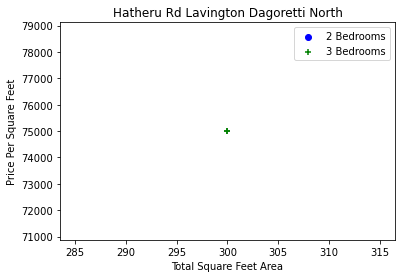

In [73]:
plot_scatter_chart(df6,'Hatheru Rd Lavington Dagoretti North')

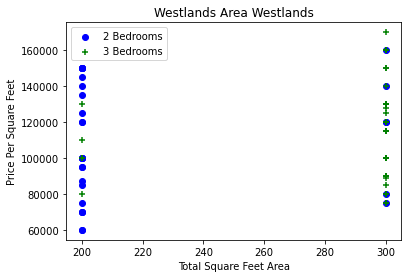

In [74]:
plot_scatter_chart(df6,'Westlands Area Westlands')

In [75]:
lower_limit=df6.price_per_sqft.quantile(0.001)
lower_limit
df6[df6.price_per_sqft<lower_limit]
upper_limit=df6.price_per_sqft.quantile(0.999)
df6[df6.price_per_sqft>upper_limit]

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,sq_ft,price_per_sqft
26,Chaka Road Kilimani Dagoretti North,170000.0,1.0,1.0,2.0,100.0,1700.0
749,Spring Valley Westlands,160000.0,1.0,2.0,1.0,100.0,1600.0


In [76]:
df7=df6[(df6.price_per_sqft>lower_limit) & (df6.price_per_sqft<upper_limit)]
df7.shape

(1298, 7)

In [77]:
def remove_bedrooms_outliers(df):
    exclude_indices=np.array([])
    for Neighborhood,Neighborhood_df in df.groupby('Neighborhood'):
        Bedrooms_stats={}
        for Bedrooms,bd_df in Neighborhood_df.groupby('Bedrooms'):
            Bedrooms_stats[Bedrooms]={
                'mean':np.mean(bd_df.price_per_sqft),
                'std':np.std(bd_df.price_per_sqft),
                'count':bd_df.shape[0]
            }
            
        for Bedrooms,bd_df in Neighborhood_df.groupby('Bedrooms'):
            stats=Bedrooms_stats.get(Bedrooms-1)
            if stats and stats['count']>50:
                exclude_indices=np.append(exclude_indices,bd_df[bd_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [78]:
df8=remove_bedrooms_outliers(df7)
df8.shape

(1178, 7)

In [79]:
df8.head()

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,sq_ft,price_per_sqft
0,Argwings Kodhek Kilimani Dagoretti North,150000.0,2.0,3.0,4.0,200.0,750.0
1,Argwings Kodhek Kilimani Dagoretti North,165000.0,2.0,3.0,4.0,200.0,825.0
2,Argwings Kodhek Rd Kilimani Dagoretti North,150000.0,2.0,2.0,2.0,200.0,750.0
3,Argwings Kodhek Road Kilimani Dagoretti North,75000.0,3.0,3.0,2.0,300.0,250.0
4,Argwings Kodhek Road Kilimani Dagoretti North,75000.0,3.0,3.0,2.0,300.0,250.0


In [80]:
df8.sq_ft.unique()

array([200., 300., 400., 100.])

Text(0, 0.5, 'Count')

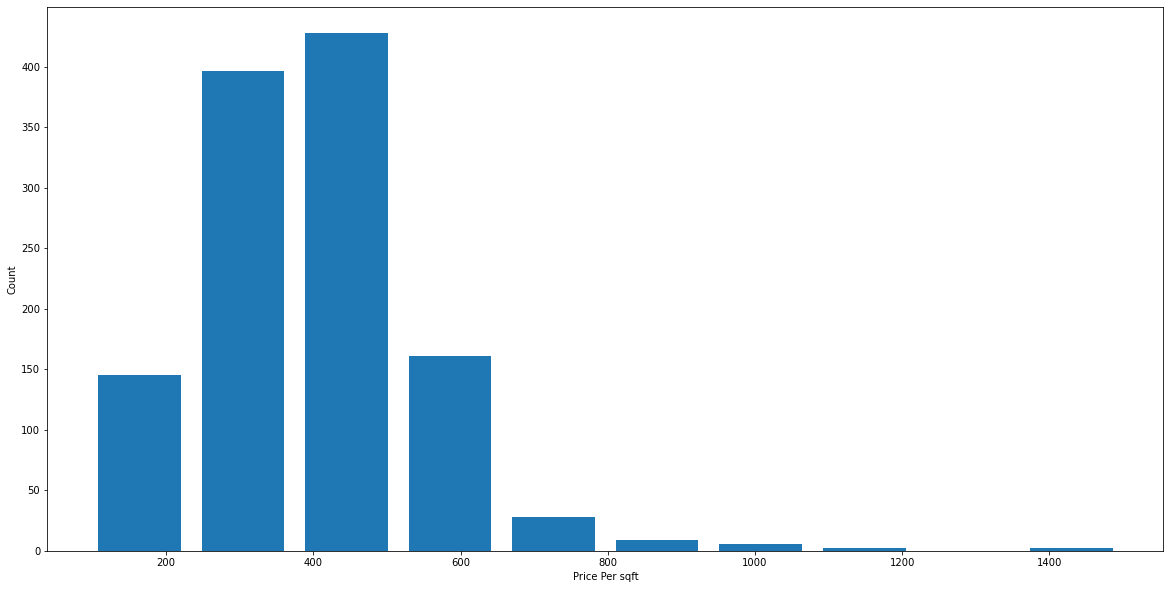

In [81]:
#my dataset is looking pretty good,i can now plot a histogram to see its normal distribution
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per sqft')
plt.ylabel('Count')

In [82]:
###booooom, my histogram  is kinda  of a normal distribution

In [83]:
df8.head(2)

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,sq_ft,price_per_sqft
0,Argwings Kodhek Kilimani Dagoretti North,150000.0,2.0,3.0,4.0,200.0,750.0
1,Argwings Kodhek Kilimani Dagoretti North,165000.0,2.0,3.0,4.0,200.0,825.0


In [84]:
df8.dtypes

Neighborhood       object
Price             float64
sq_mtrs           float64
Bedrooms          float64
Bathrooms         float64
sq_ft             float64
price_per_sqft    float64
dtype: object

In [85]:
df8.Bedrooms=df8.Bedrooms.astype(int)
df8.Bathrooms=df8.Bathrooms.astype(int)
df8.sq_ft=df8.sq_ft.astype(int)
df8.sq_ft.dtypes

dtype('int32')

In [86]:
df8.dtypes

Neighborhood       object
Price             float64
sq_mtrs           float64
Bedrooms            int32
Bathrooms           int32
sq_ft               int32
price_per_sqft    float64
dtype: object

In [119]:
#next i will get dummy values for my neighborhood columns
dummies=pd.get_dummies(df8.Neighborhood)
dummies.head(4)

,Argwings Kodhek Kilimani Dagoretti North,Argwings Kodhek Rd Kilimani Dagoretti North,Argwings Kodhek Road Kilimani Dagoretti North,Brookside Brookside Westlands,Brookside Drive Brookside Westlands,Brookside Westlands,Brookside Westlands Area Westlands,Brookside groove Brookside Westlands,Chania Avenue Kilimani Dagoretti North,Denis Pritt Kilimani Dagoretti North,...,kiambu road kiambu road Kiambu Road Kiambu Road,kileleshwa Kileleshwa Kileleshwa Dagoretti North,kileleshwa kileleshwa Kileleshwa Dagoretti North,kilimani Kilimani Kilimani Dagoretti North,kilimani kilimani Kilimani Dagoretti North,lavington Lavington Lavington Dagoretti North,lavington lavington Lavington Dagoretti North,mvuli road Rhapta Road Westlands,other,riverside Riverside Riverside Westlands
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
df9=pd.concat([df8,dummies.drop('other',axis='columns')],axis=1)
df9.head(5)

,Neighborhood,Price,sq_mtrs,Bedrooms,Bathrooms,sq_ft,price_per_sqft,Argwings Kodhek Kilimani Dagoretti North,Argwings Kodhek Rd Kilimani Dagoretti North,Argwings Kodhek Road Kilimani Dagoretti North,...,Westlands Westlands Area Westlands,kiambu road kiambu road Kiambu Road Kiambu Road,kileleshwa Kileleshwa Kileleshwa Dagoretti North,kileleshwa kileleshwa Kileleshwa Dagoretti North,kilimani Kilimani Kilimani Dagoretti North,kilimani kilimani Kilimani Dagoretti North,lavington Lavington Lavington Dagoretti North,lavington lavington Lavington Dagoretti North,mvuli road Rhapta Road Westlands,riverside Riverside Riverside Westlands
0,Argwings Kodhek Kilimani Dagoretti North,150000.0,2.0,3,4,200,750.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Argwings Kodhek Kilimani Dagoretti North,165000.0,2.0,3,4,200,825.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Argwings Kodhek Rd Kilimani Dagoretti North,150000.0,2.0,2,2,200,750.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Argwings Kodhek Road Kilimani Dagoretti North,75000.0,3.0,3,2,300,250.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Argwings Kodhek Road Kilimani Dagoretti North,75000.0,3.0,3,2,300,250.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [89]:
X=df9.drop(['Neighborhood','Price','sq_mtrs','price_per_sqft'],axis='columns')
X.head(4)

,Bedrooms,Bathrooms,sq_ft,Argwings Kodhek Kilimani Dagoretti North,Argwings Kodhek Rd Kilimani Dagoretti North,Argwings Kodhek Road Kilimani Dagoretti North,Brookside Brookside Westlands,Brookside Drive Brookside Westlands,Brookside Westlands,Brookside Westlands Area Westlands,...,Westlands Westlands Area Westlands,kiambu road kiambu road Kiambu Road Kiambu Road,kileleshwa Kileleshwa Kileleshwa Dagoretti North,kileleshwa kileleshwa Kileleshwa Dagoretti North,kilimani Kilimani Kilimani Dagoretti North,kilimani kilimani Kilimani Dagoretti North,lavington Lavington Lavington Dagoretti North,lavington lavington Lavington Dagoretti North,mvuli road Rhapta Road Westlands,riverside Riverside Riverside Westlands
0,3,4,200,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,4,200,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,200,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,300,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
y=df9.Price
y.head(3)

0    150000.0
1    165000.0
2    150000.0
Name: Price, dtype: float64

In [91]:
150000/1000000

0.15

In [92]:
X.head()

,Bedrooms,Bathrooms,sq_ft,Argwings Kodhek Kilimani Dagoretti North,Argwings Kodhek Rd Kilimani Dagoretti North,Argwings Kodhek Road Kilimani Dagoretti North,Brookside Brookside Westlands,Brookside Drive Brookside Westlands,Brookside Westlands,Brookside Westlands Area Westlands,...,Westlands Westlands Area Westlands,kiambu road kiambu road Kiambu Road Kiambu Road,kileleshwa Kileleshwa Kileleshwa Dagoretti North,kileleshwa kileleshwa Kileleshwa Dagoretti North,kilimani Kilimani Kilimani Dagoretti North,kilimani kilimani Kilimani Dagoretti North,lavington Lavington Lavington Dagoretti North,lavington lavington Lavington Dagoretti North,mvuli road Rhapta Road Westlands,riverside Riverside Riverside Westlands
0,3,4,200,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,4,200,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,200,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2,300,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2,300,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
#next is spliting my dataset for training and testing

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [95]:
len(X_train)

942

In [96]:
len(X_test)

236

In [97]:
X_train.shape

(942, 147)

In [98]:
X_train.head(2)

,Bedrooms,Bathrooms,sq_ft,Argwings Kodhek Kilimani Dagoretti North,Argwings Kodhek Rd Kilimani Dagoretti North,Argwings Kodhek Road Kilimani Dagoretti North,Brookside Brookside Westlands,Brookside Drive Brookside Westlands,Brookside Westlands,Brookside Westlands Area Westlands,...,Westlands Westlands Area Westlands,kiambu road kiambu road Kiambu Road Kiambu Road,kileleshwa Kileleshwa Kileleshwa Dagoretti North,kileleshwa kileleshwa Kileleshwa Dagoretti North,kilimani Kilimani Kilimani Dagoretti North,kilimani kilimani Kilimani Dagoretti North,lavington Lavington Lavington Dagoretti North,lavington lavington Lavington Dagoretti North,mvuli road Rhapta Road Westlands,riverside Riverside Riverside Westlands
107,2,2,200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
682,2,2,200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
#using gridsearchcv to get me the best algorithm to create my model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [108]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,2,3],
                'kernel':['linear','rbf']
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{}
        }
    }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [6]:
find_best_model_using_gridsearchcv(X_train,y_train)

NameError: name 'X_train' is not defined

In [100]:
X_train.shape

(942, 147)

In [101]:
cross_val_score(SVC(),X_train,y_train)

C:\Users\sojore\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


array([0.11640212, 0.0952381 , 0.11170213, 0.09574468, 0.11170213])

In [102]:
cross_val_score(Lasso(),X_train,y_train)

array([0.53040377, 0.54751539, 0.57096234, 0.51272601, 0.56880965])

In [103]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [104]:
model.score(X_test,y_test)

0.5308957617664455

In [105]:
#linear regression seems to be a better algorithm to create my model
y_predicted=model.predict(X_test)
y_predicted[:10]

array([ 58614.07746873, 129928.83588926,  96687.7223194 , 129928.83588926,
        84080.37118994, 113855.56824791, 115932.2981828 , 115115.77237055,
       122047.38692836,  88679.04316463])

In [106]:
y_test[:10]

93      45000.0
872    130000.0
860    120000.0
824     80000.0
640     90000.0
411    120000.0
472     80000.0
30     125000.0
192    150000.0
303    115000.0
Name: Price, dtype: float64

In [126]:
X_train.columns.unique()

Index(['Bedrooms', 'Bathrooms', 'sq_ft',
       'Argwings Kodhek Kilimani Dagoretti North',
       'Argwings Kodhek Rd Kilimani Dagoretti North',
       'Argwings Kodhek Road Kilimani Dagoretti North',
       'Brookside Brookside Westlands', 'Brookside Drive Brookside Westlands',
       'Brookside Westlands', 'Brookside Westlands Area Westlands',
       ...
       'Westlands Westlands Area Westlands',
       'kiambu road kiambu road Kiambu Road Kiambu Road',
       'kileleshwa Kileleshwa Kileleshwa Dagoretti North',
       'kileleshwa kileleshwa Kileleshwa Dagoretti North',
       'kilimani Kilimani Kilimani Dagoretti North',
       'kilimani kilimani Kilimani Dagoretti North',
       'lavington Lavington Lavington Dagoretti North',
       'lavington lavington Lavington Dagoretti North',
       'mvuli road Rhapta Road Westlands',
       'riverside Riverside Riverside Westlands'],
      dtype='object', length=147)

In [110]:
#next we code a prediction price function
def predict_price(Neighborhood,bedrooms,bathrooms,sq_ft):
    loc_index=np.where(X.columns==Neighborhood)[0][0]#this method helps locate the columns index
    x=np.zeros(len(X.columns))
    x[0]=bedrooms
    x[1]=bathrooms
    x[2]=sq_ft
    if loc_index>=0:
        x[loc_index]=1##here we are setting our particular index to be 1
        
    return model.predict([x])[0]

In [111]:
predict_price('riverside Riverside Riverside Westlands',2,4,200)

102168.38279666947

In [122]:
predict_price('Westlands Area Westlands',3,3,200)

108996.53770645254

In [132]:
predict_price('Argwings Kodhek Rd Kilimani Dagoretti North',4,4,400)

216482.2271395977

In [133]:
#my model is predicting fair results
#this comes down to insufficient knowhow on how the sq_mtrs column values were initially tabled

In [134]:
#now im gonna save my model as a pickle file
#save my columns as a json object
import pickle
with open('housing_prediction(neighborhoods).pickle','wb') as f:
    pickle.dump(model,f)

In [135]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open('h_p_neighborhoods_columns.jason','w') as f:
    f.write(json.dumps(columns))

In [136]:
###Thankyou God